<a href="https://colab.research.google.com/github/zdepablo/Attentive_Convolution/blob/master/News_Baseline_Vocabulary_Exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# News Dataset Multiclass classification model

## Objective 

Build a baseline model for the classifier using a scikit-learn

### Procedure 

We will start with a simple classifier and a simple notebook structure using only headlines. 

### TO-DO: Improvements 

  - Include short descriptions
  - Cross - Validation 
  - Use different fields for different parts of the document
  - Use a vocabulary, sopwords and pre-processing more careful - e.g. Spacy 
  - Be a bit more semantic: stemming, word2vec 
  - Compare with fasttext, word2vec, bert

### Conclusions 


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix



import seaborn as sns

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)

In [4]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.2.5.
The scikit-learn version is 0.22.1.


## 1. Load the data and prepare

In [5]:
NEWS_TRAIN_PATH = "News_category_train.json"
NEWS_TEST_PATH  = "News_category_test.json"

df = pd.read_json(NEWS_TRAIN_PATH)
df_test = pd.read_json(NEWS_TEST_PATH)

num_instances_train = df.shape[0]
num_instances_test  = df_test.shape[0]

print(df.columns)

print(f"Train dataset size: {num_instances_train}")
print(f"Test  dataset size: {num_instances_test}")

Index(['authors', 'category', 'headline', 'link', 'short_description'], dtype='object')
Train dataset size: 65000
Test  dataset size: 34171


In [0]:
df["id"] = range(0,num_instances_train)
df_test["id"] = range(0,num_instances_test)

TODO: Clean anomalies like duplicated

## 2. Prepare dataset for classification 

In [0]:
X_train = df.headline
Y_train = df.category

X_test  = df_test.headline
Y_test  = df_test.category

## 2. Build model

In [0]:
vectorizer = CountVectorizer(encoding = 'utf-8',
                             strip_accents ='unicode', 
                             lowercase = True, 
                             stop_words = 'english', 
                             ngram_range =(1,2),
                             min_df = 10,
                             max_df = 0.7,
                             max_features = 5000
                             )

#classifier = LogisticRegression(solver='saga', penalty="l1", multi_class='multinomial'   )
classifier = ComplementNB(alpha=0.1, fit_prior=True)
#classifier = MultinomialNB(alpha=1.0, fit_prior=False)

pipeline = Pipeline([
    ('count_vectorizer', vectorizer),
    ('classifier',classifier)
    ])

In [24]:
pipeline.fit(X_train, Y_train)

Pipeline(memory=None,
         steps=[('count_vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.7,
                                 max_features=5000, min_df=10,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words='english', strip_accents='unicode',
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 ComplementNB(alpha=0.1, class_prior=None, fit_prior=True,
                              norm=False))],
         verbose=False)

In [0]:
Y_train_hat = pipeline.predict(X_train)

In [26]:
Y_train_hat[0:10]

array(['A', 'A', 'J', 'A', 'A', 'A', 'F', 'G', 'A', 'A'], dtype='<U1')

In [27]:
print(classification_report(Y_train, Y_train_hat))

              precision    recall  f1-score   support

           A       0.52      0.36      0.42      2000
           B       0.68      0.46      0.55      2000
           C       0.54      0.58      0.56      2000
           D       0.75      0.66      0.70     10000
           E       0.83      0.78      0.80      5000
           F       0.76      0.88      0.82     10000
           G       0.82      0.88      0.85     20000
           H       0.62      0.37      0.46      2000
           I       0.64      0.30      0.41      2000
           J       0.73      0.83      0.78     10000

    accuracy                           0.76     65000
   macro avg       0.69      0.61      0.64     65000
weighted avg       0.75      0.76      0.75     65000



In [28]:
Y_test_hat = pipeline.predict(X_test)
print(classification_report(Y_test, Y_test_hat))

              precision    recall  f1-score   support

           A       0.65      0.32      0.42      1878
           B       0.74      0.43      0.54      1945
           C       0.55      0.52      0.54      1405
           D       0.45      0.61      0.52      1971
           E       0.79      0.75      0.77      2077
           F       0.78      0.86      0.82      6098
           G       0.81      0.88      0.84     12739
           H       0.78      0.32      0.45      2756
           I       0.37      0.25      0.30       670
           J       0.54      0.81      0.65      2632

    accuracy                           0.72     34171
   macro avg       0.65      0.58      0.59     34171
weighted avg       0.73      0.72      0.71     34171



In [0]:
test_class_report = classification_report(Y_test, Y_test_hat,output_dict=True)

In [30]:
pd.DataFrame(data=test_class_report)

,A,B,C,D,E,F,G,H,I,J,accuracy,macro avg,weighted avg
precision,0.650549,0.736283,0.554135,0.445876,0.789340,0.778762,0.808283,0.781671,0.370044,0.544666,0.719148,0.645961,0.726699
recall,0.315229,0.427763,0.524555,0.614409,0.748676,0.864710,0.879347,0.315675,0.250746,0.810790,0.719148,0.575190,0.719148
f1-score,0.424677,0.541138,0.538940,0.516748,0.768470,0.819489,0.842319,0.449729,0.298932,0.651603,0.719148,0.585205,0.705399
support,1878.000000,1945.000000,1405.000000,1971.000000,2077.000000,6098.000000,12739.000000,2756.000000,670.000000,2632.000000,0.719148,34171.000000,34171.000000


In [224]:
len(pipeline['count_vectorizer'].vocabulary_)

5000

In [0]:
features = pipeline['count_vectorizer'].get_feature_names()

In [226]:
len(features)

5000

In [227]:
features[0:20]

['000',
 '10',
 '10 000',
 '10 best',
 '10 reasons',
 '10 things',
 '10 tips',
 '10 ways',
 '10 year',
 '10 years',
 '100',
 '100 days',
 '101',
 '11',
 '11 things',
 '11 year',
 '12',
 '12 year',
 '13',
 '13 year']

In [228]:
len(pipeline['count_vectorizer'].stop_words_)

292775

In [0]:
train_confusion_matrix = confusion_matrix(Y_train, Y_train_hat)

In [0]:
labels = ['A','B','C','D','E','F','G','H','I','J']

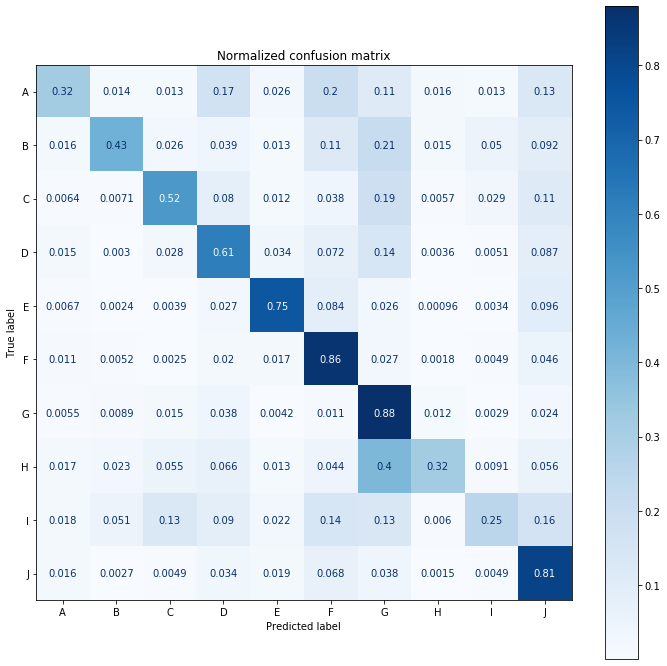

In [33]:
plt.rcParams["figure.figsize"] = (12,12)

# Plot non-normalized confusion matrix
disp = plot_confusion_matrix(pipeline, X_test, Y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues,
                                 normalize='true', values_format = '.2g')
disp.ax_.set_title("Normalized confusion matrix")

# print(title)
# print(disp.confusion_matrix)

plt.show()

In [0]:
features = pipeline['count_vectorizer'].transform(X_train)

In [0]:
def showFreqTerms(X_train_counts, vectorizer, ):
    sum_words = X_train_counts.sum(axis = 0)

    term_freq = [(word,sum_words[0,idx]) for word,idx in vectorizer.vocabulary_.items()]
    return sorted(term_freq, key = lambda x:x[1], reverse = True)

In [234]:
showFreqTerms(features, vectorizer)[0:10]

[('trump', 6104),
 ('photos', 4496),
 ('new', 2778),
 ('video', 2104),
 ('donald', 2009),
 ('donald trump', 1973),
 ('kids', 1535),
 ('day', 1514),
 ('says', 1415),
 ('gay', 1388)]

In [235]:
X_train[Y_train == 'A'].head()

0    'Rice-Ko' Is What Happens When Artists Recreate Rothko Paintings Using Rice             
1    Fragments of Femininity: A Comparative Analysis of the Art of Tracey Emin and Kiki Smith
2    We Appreciate Arrested Development Better Today, But We're Losing Something Else        
3    The 10 Must-See Sundance Films For Art Lovers                                           
4    Vera Iliatova on the ImageBlog                                                          
Name: headline, dtype: object

In [0]:
kk = showFreqTerms(pipeline['count_vectorizer'].transform(X_train[Y_train == 'A']), vectorizer)[0:30]

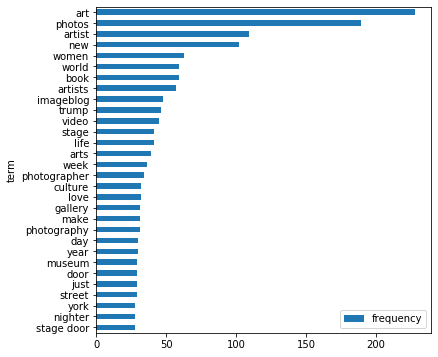

In [237]:
plt.rcParams["figure.figsize"] = (6,6)

pd.DataFrame(kk, columns = ["term", "frequency"]).set_index("term").sort_values("frequency").plot(kind="barh") 

In [238]:
for l in labels: 
  print(l)
  print(X_train[Y_train == l].sample(n = 5))
  print()

A
1292    Only Lin-Manuel Miranda Could Turn Trump's Tweets Into Something We Want To Pay Attention To
933     Aisle View: Gloria's Wild Ride                                                              
1613    Mysterious J.K. Rowling Tweet Has 'Fantastic Beasts' Fans Freaking Out                      
1146    The Plot Of Every Original 'Baby-Sitters Club' Book, Based On The Covers                    
197     Top 5 Sizzling Hot Winter Music Festivals in Frigid New York City                           
Name: headline, dtype: object

B
3186    Saving Our Birds                                                              
3806    Climate Change Through Sound: Video Shows Rising Temperatures With Cello Music
2041    The African Elephant's 'Last Days'                                            
3494    Clean Energy Is Dirt Cheap -- Unless You Live In Southeast Asia               
3967    Does Reality Bite? Philosophy, Ecology and the "End of the World"             
Name: headline, dtype: ob

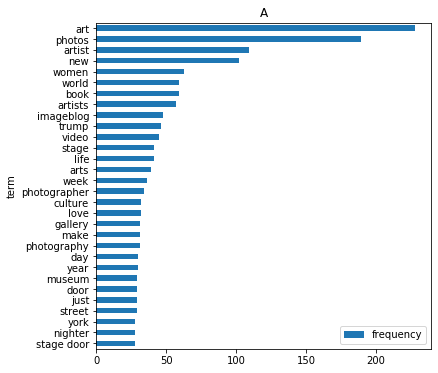

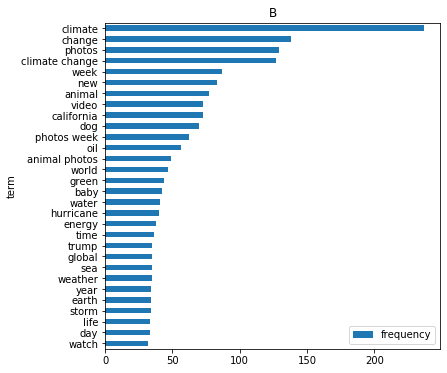

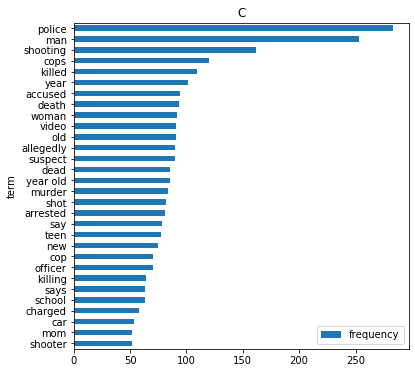

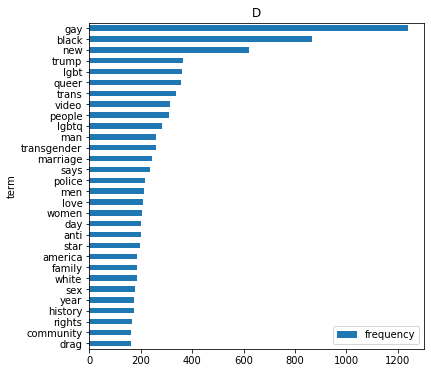

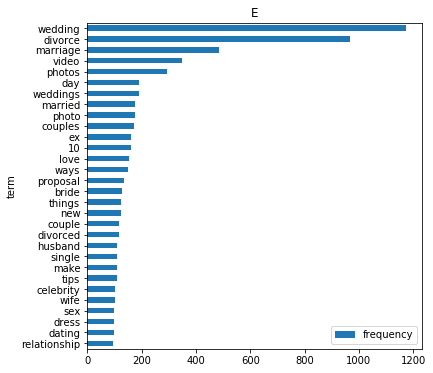

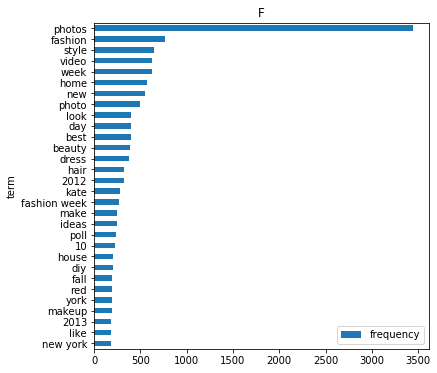

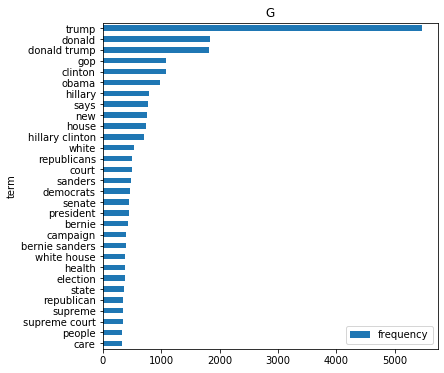

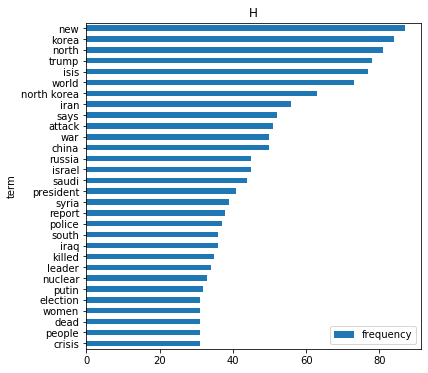

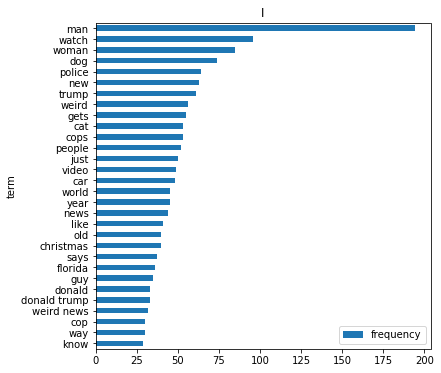

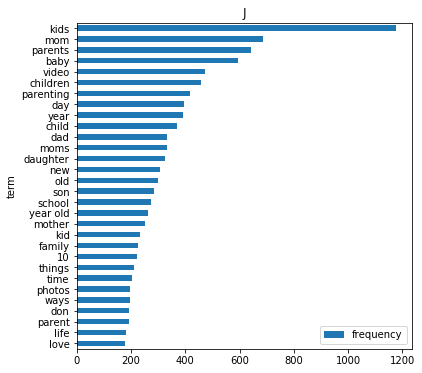

In [239]:
for l in labels: 
  freqTerms = showFreqTerms(pipeline['count_vectorizer'].transform(X_train[Y_train == l]), vectorizer)[0:30]
  pd.DataFrame(freqTerms, columns = ["term", "frequency"]).set_index("term").sort_values("frequency").plot(kind="barh", title = l ) 
